In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
applications = pd.read_csv('application_record.csv')
credits = pd.read_csv('credit_record.csv')

In [3]:
applications.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credits.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
credits.shape, applications.shape

((1048575, 3), (438557, 18))

In [6]:
len(credits['ID'].unique()), len(applications['ID'].unique())

(45985, 438510)

In [7]:
print(f'Duplicates in applications data: {applications.iloc[:,1:].duplicated().sum()}, ({np.round(100*applications.iloc[:,1:].duplicated().sum()/len(applications),1)}%)')

Duplicates in applications data: 348472, (79.5%)


In [8]:
applications[applications.iloc[:,1:].duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [9]:
applications=applications.drop_duplicates(subset=applications.columns[1:], keep='first')

In [10]:
credits.duplicated().sum()

0

In [11]:
applications.drop(['FLAG_MOBIL'], inplace=True, axis=1)

In [12]:
credits['STATUS'].nunique()
for col in applications.columns:
    print(col ,applications[col].nunique())
print("-------------------------------")
for col in credits.columns:
    print(col ,credits[col].nunique())


ID 90085
CODE_GENDER 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 12
AMT_INCOME_TOTAL 866
NAME_INCOME_TYPE 5
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 5
NAME_HOUSING_TYPE 6
DAYS_BIRTH 16379
DAYS_EMPLOYED 9406
FLAG_WORK_PHONE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 13
-------------------------------
ID 45985
MONTHS_BALANCE 61
STATUS 8


In [13]:
applications['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      27477
Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: OCCUPATION_TYPE, dtype: int64

In [14]:
applications.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [15]:
credits.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Text(0.5, 1.0, 'Missing Data for application records dataset')

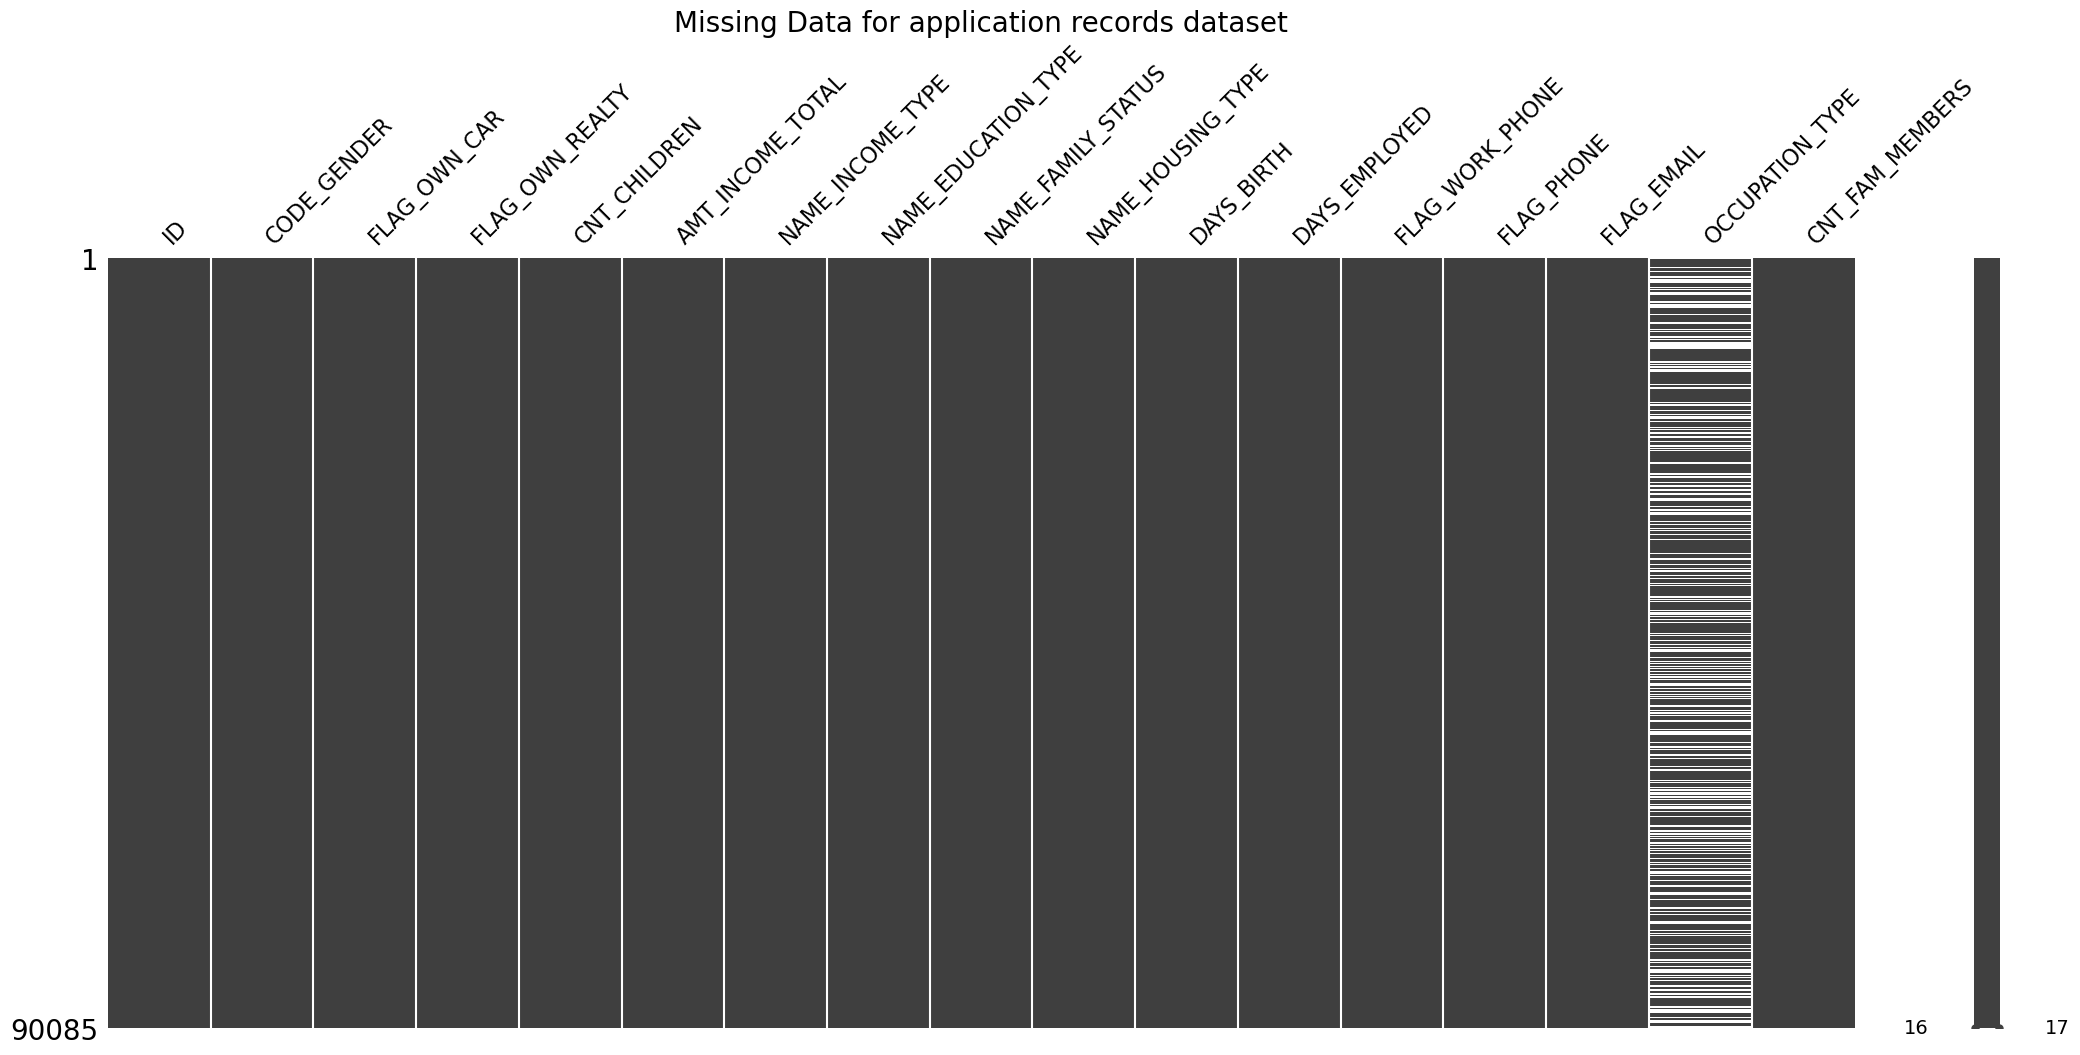

In [16]:
import missingno as msno
missing = msno.matrix(applications)
missing.set_title("Missing Data for application records dataset",fontsize=20)

In [17]:
applications['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

In [18]:
applications['OCCUPATION_TYPE'].value_counts(dropna=False)

Other                    27477
Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90085 entries, 0 to 438553
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   90085 non-null  int64  
 1   CODE_GENDER          90085 non-null  object 
 2   FLAG_OWN_CAR         90085 non-null  object 
 3   FLAG_OWN_REALTY      90085 non-null  object 
 4   CNT_CHILDREN         90085 non-null  int64  
 5   AMT_INCOME_TOTAL     90085 non-null  float64
 6   NAME_INCOME_TYPE     90085 non-null  object 
 7   NAME_EDUCATION_TYPE  90085 non-null  object 
 8   NAME_FAMILY_STATUS   90085 non-null  object 
 9   NAME_HOUSING_TYPE    90085 non-null  object 
 10  DAYS_BIRTH           90085 non-null  int64  
 11  DAYS_EMPLOYED        90085 non-null  int64  
 12  FLAG_WORK_PHONE      90085 non-null  int64  
 13  FLAG_PHONE           90085 non-null  int64  
 14  FLAG_EMAIL           90085 non-null  int64  
 15  OCCUPATION_TYPE      90085 non-null

In [20]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [21]:
credits['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [22]:
credits['target']=credits['STATUS']
credits['target'].replace('X', 0, inplace=True)
credits['target'].replace('C', 0, inplace=True)
credits['target']=credits['target'].astype(int)
credits.loc[credits['target']>=1,'target']=1

In [23]:
credits

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [24]:
df=pd.DataFrame(credits.groupby(['ID'])['target'].agg(max)).reset_index()

In [25]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [26]:
new_df=pd.merge(applications, df, how='inner', on=['ID'])

In [27]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1


In [28]:
new_df.shape

(9709, 18)

In [29]:
start_df=pd.DataFrame(credits.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [30]:
start_df.head()

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [31]:
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [32]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5


In [33]:
new_df['AGE_YEARS']=round(-new_df['DAYS_BIRTH']/365,0)

In [34]:
new_df['AGE_YEARS']

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: AGE_YEARS, Length: 9709, dtype: float64

In [35]:
new_df.drop(["DAYS_BIRTH"],axis=1,inplace=True)

In [36]:
new_df['UNEMPLOYED']=0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

In [37]:
new_df['DAYS_EMPLOYED']

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

In [38]:
new_df['YEARS_EMPLOYED']=round(-new_df['DAYS_EMPLOYED']/365)
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [39]:
new_df['YEARS_EMPLOYED']


0       12.0
1        3.0
2        8.0
3        0.0
4        2.0
        ... 
9704     1.0
9705     7.0
9706     5.0
9707     4.0
9708     3.0
Name: YEARS_EMPLOYED, Length: 9709, dtype: float64

In [40]:
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [41]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [42]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0


In [43]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [44]:
new_df.dtypes


ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int32
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

<Figure size 1000x1000 with 0 Axes>

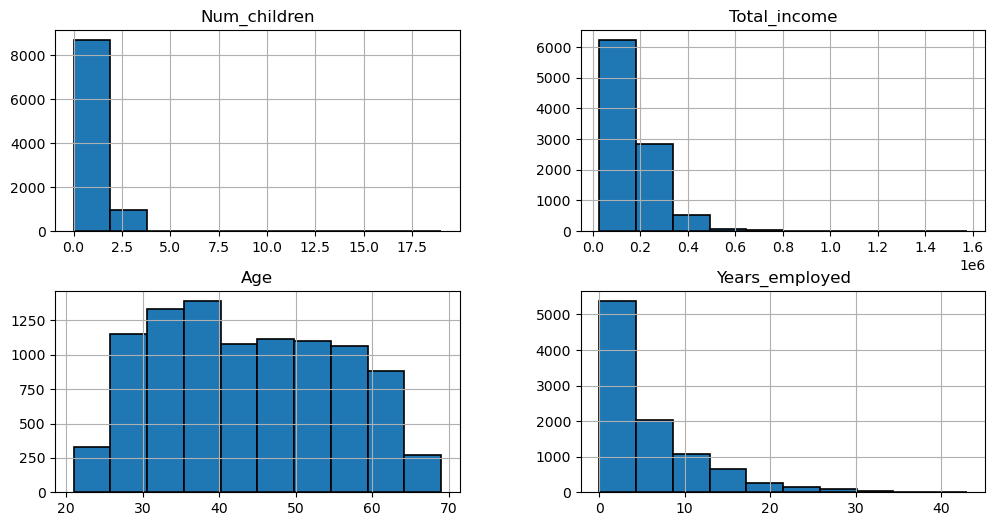

In [45]:
plt.figure(figsize=(10,10))

cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

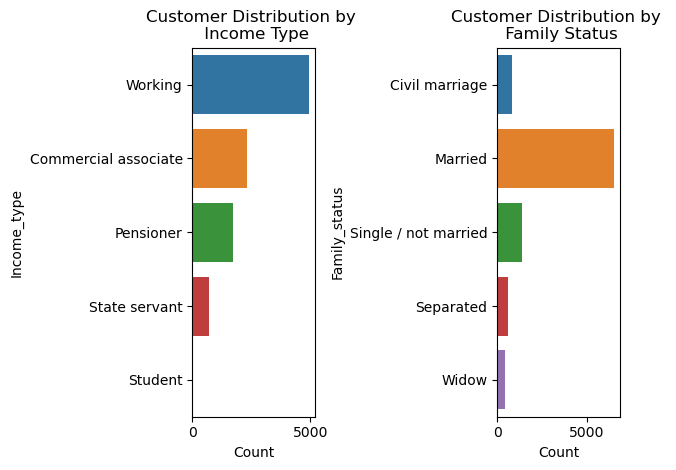

In [46]:
ig, axes = plt.subplots(1,2)
g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Income Type")
g1.set_xlabel("Count")
g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Family Status")
g2.set_xlabel("Count")
fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

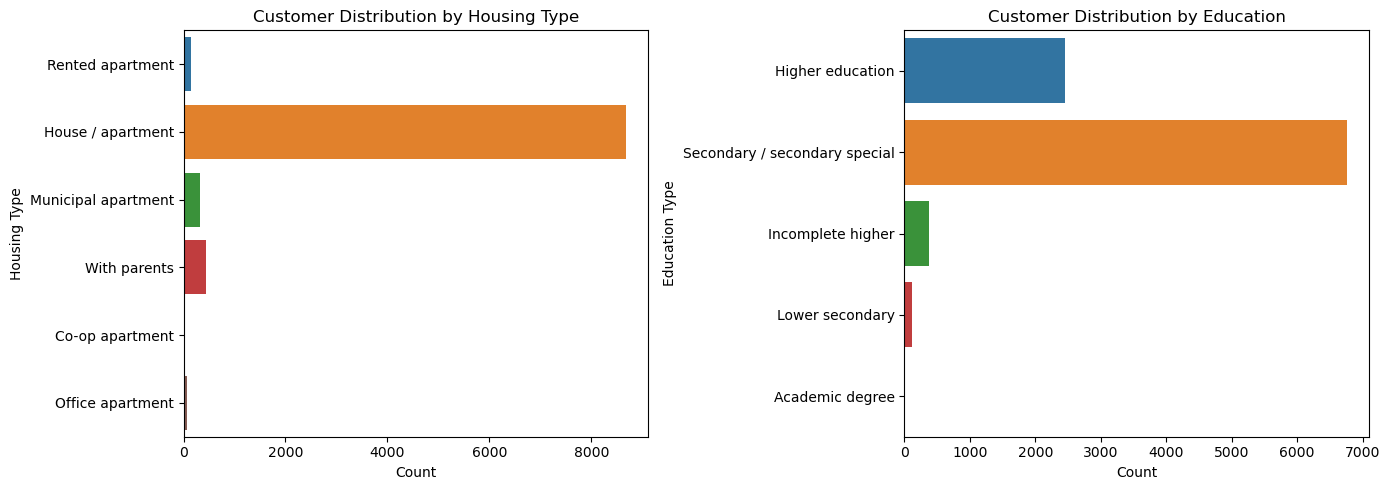

In [47]:
fig, axes = plt.subplots(1,2)
g1= sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")
g2= sns.countplot(y=new_df.Education_type, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")
fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

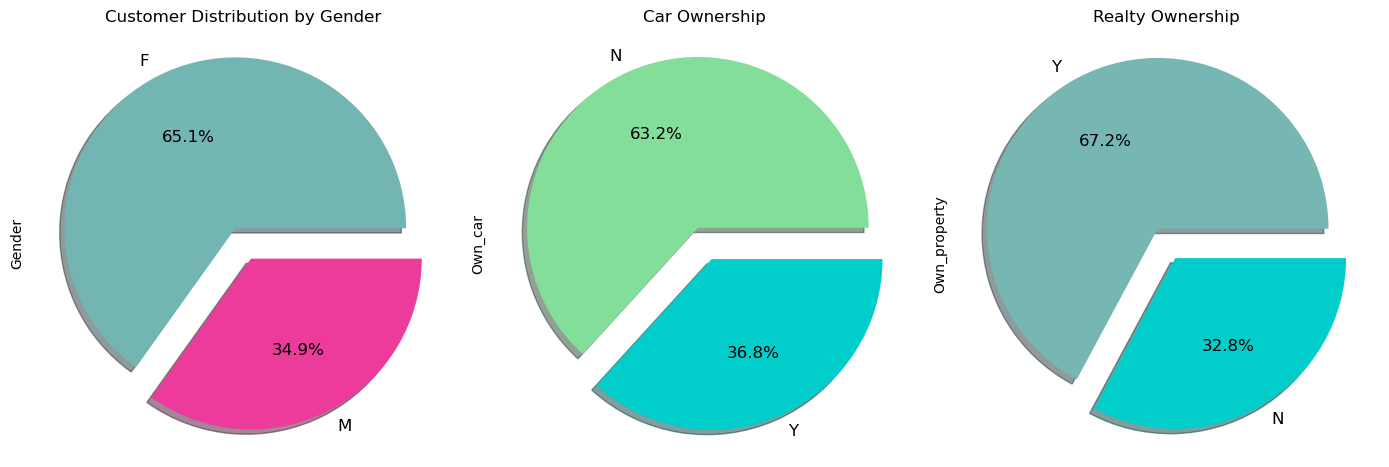

In [48]:
fig, axes = plt.subplots(1,3)
g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")
g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")
g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")
fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

In [49]:
object_columns = new_df.columns[new_df.dtypes =='object'].tolist() 
unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts

,Column_Name,Num_Unique
0,Gender,2
1,Own_car,2
2,Own_property,2
3,Income_type,5
4,Education_type,5
5,Family_status,5
6,Housing_type,6
7,Occupation_type,19


In [50]:
new_df["Gender"] =  new_df["Gender"].replace(['F','M'],[0,1])
new_df["Own_car"] = new_df["Own_car"].replace(["Y","N"],[1,0])
new_df["Own_property"] = new_df["Own_property"].replace(["Y","N"],[1,0])

In [51]:
new_df["Is_Working"] = new_df["Income_type"].replace(["Working","Commercial associate","State servant","Pensioner","Student"],[1,1,1,0,0])

new_df["Marital_status"] = new_df["Family_status"].replace(["Civil marriage","Married","Single / not married",
                                                                          "Separated","Widow"],[1,1,0,0,0])

In [52]:
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

In [53]:
new_df["Housing_type"] = new_df['Housing_type'].map(housing_type)

In [54]:
family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

new_df["Family_status"] = new_df["Family_status"].map(family_status)

In [55]:
education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

new_df["Education_type"] = new_df["Education_type"].map(education_type)

In [56]:
income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

new_df["Income_type"] = new_df["Income_type"].map(income_type)

In [57]:
new_df["Household_Size"] = new_df["Num_children"] + new_df["Marital_status"].apply(lambda x: 2 if x==1 else 1)

In [58]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,0,0,Other,2.0,1,15,33.0,0,12.0,1,1,2
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.0,1,1,2
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.0,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,secondary,Married,House / apartment,0,0,0,Laborers,2.0,1,20,56.0,0,1.0,0,1,2
9705,5149055,0,0,1,0,112500.0,Working,secondary,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.0,1,1,2
9706,5149729,1,1,1,0,90000.0,Working,secondary,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,5.0,1,1,2
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,4.0,0,1,2


In [59]:
new_df["Years_employed"].value_counts()


0.0     1978
1.0      991
2.0      848
3.0      826
4.0      736
5.0      645
6.0      508
7.0      464
8.0      419
9.0      354
10.0     306
11.0     228
12.0     185
15.0     180
13.0     163
14.0     139
16.0      87
17.0      76
19.0      70
18.0      67
20.0      57
21.0      56
22.0      46
24.0      38
23.0      38
26.0      29
25.0      27
28.0      23
27.0      20
29.0      18
30.0      15
31.0      11
32.0      11
33.0      11
34.0       9
35.0       6
38.0       4
36.0       4
41.0       4
40.0       3
37.0       3
39.0       3
43.0       2
42.0       1
Name: Years_employed, dtype: int64

In [60]:
new_df["Household_Size"].value_counts()


2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: Household_Size, dtype: int64

In [61]:
new_df[(new_df["Years_employed"]==43)]


,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size
7142,5112905,0,0,1,0,180000.0,Working,secondary,Married,House / apartment,0,0,0,Medicine staff,2.0,0,16,63.0,0,43.0,1,1,2
9328,5148702,0,0,1,0,126000.0,Working,secondary,Married,House / apartment,0,0,0,Core staff,2.0,0,57,62.0,0,43.0,1,1,2


<Axes: >

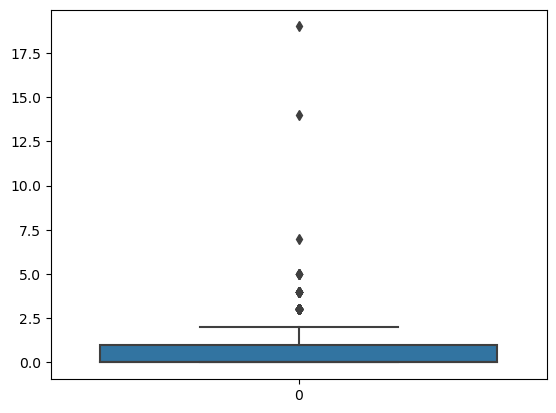

In [62]:
sns.boxplot(new_df['Num_children'])

In [63]:
high_bound = new_df['Num_children'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = new_df['Num_children'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [64]:
new_df = new_df[(new_df['Num_children']>=low_bound) & (new_df['Num_children']<=high_bound)]

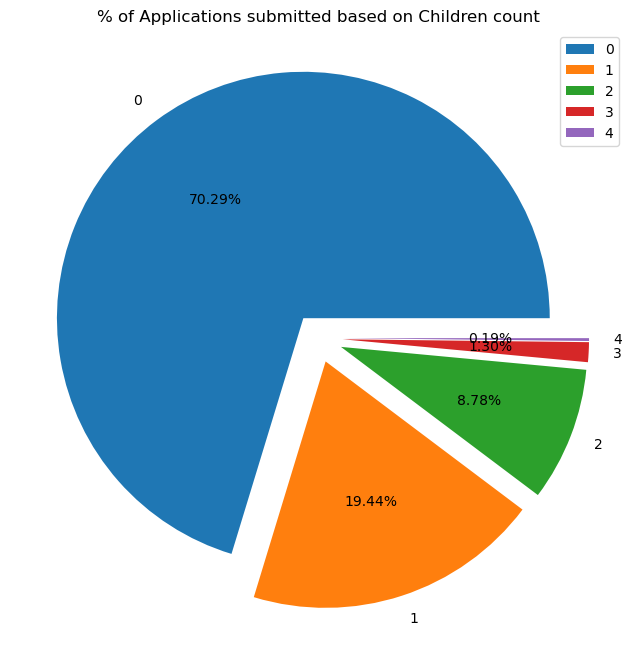

In [65]:
plt.figure(figsize = (8,8))
plt.pie(new_df['Num_children'].value_counts(), labels=new_df['Num_children'].value_counts().index,explode = [0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

In [66]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family','Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size','Target']]

In [67]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size,Target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,0,0,Other,2.0,15,33.0,0,12.0,1,1,2,1
1,5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,0,0,0,Security staff,2.0,29,59.0,0,3.0,1,1,2,0
2,5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,0,1,1,Sales staff,1.0,4,52.0,0,8.0,1,0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,0,0,0,Other,1.0,20,62.0,1,0.0,0,0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,5,46.0,0,2.0,1,1,2,0


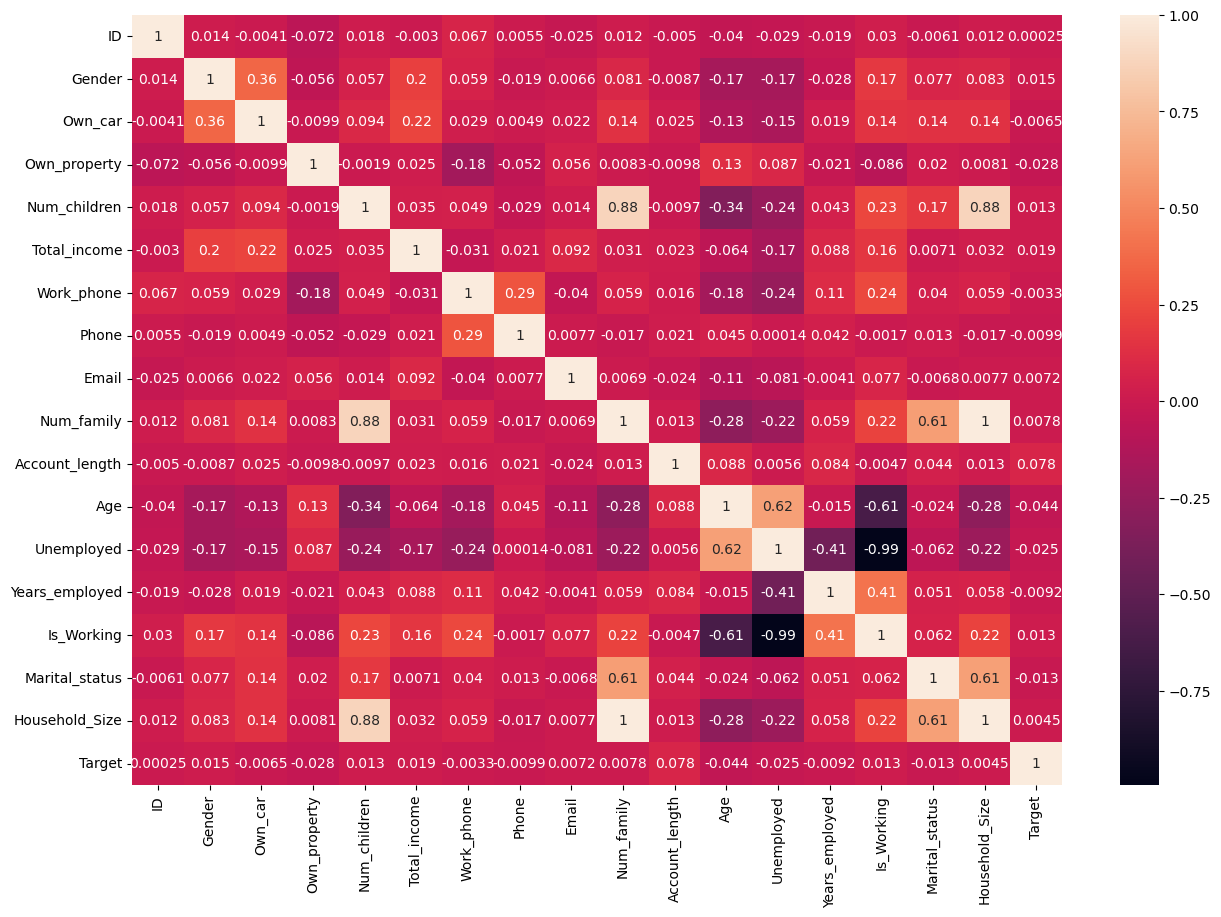

In [68]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [69]:
new_df.drop('Num_family', axis=1, inplace=True)
new_df.drop(["ID"],axis=1,inplace=True)
new_df.drop('Num_children', axis=1, inplace=True)
new_df.drop(["Email"],axis=1,inplace=True)
new_df.drop('Is_Working', axis=1, inplace=True)
new_df.drop(["Phone"],axis=1,inplace=True)
new_df.drop(["Work_phone"],axis=1,inplace=True)
new_df.drop(["Occupation_type"],axis=1,inplace=True)
new_df.drop(["Family_status"],axis=1,inplace=True)
new_df.drop(["Account_length"],axis=1,inplace=True)

In [70]:
new_df.shape

(9701, 13)

In [71]:
new_df.head()

,Gender,Own_car,Own_property,Total_income,Income_type,Education_type,Housing_type,Age,Unemployed,Years_employed,Marital_status,Household_Size,Target
0,1,1,1,427500.0,Working,Higher education,House / apartment,33.0,0,12.0,1,2,1
1,1,1,1,112500.0,Working,secondary,House / apartment,59.0,0,3.0,1,2,0
2,0,0,1,270000.0,Working,secondary,House / apartment,52.0,0,8.0,0,1,0
3,0,0,1,283500.0,Pensioner,Higher education,House / apartment,62.0,1,0.0,0,1,0
4,1,1,1,270000.0,Working,Higher education,House / apartment,46.0,0,2.0,1,2,0


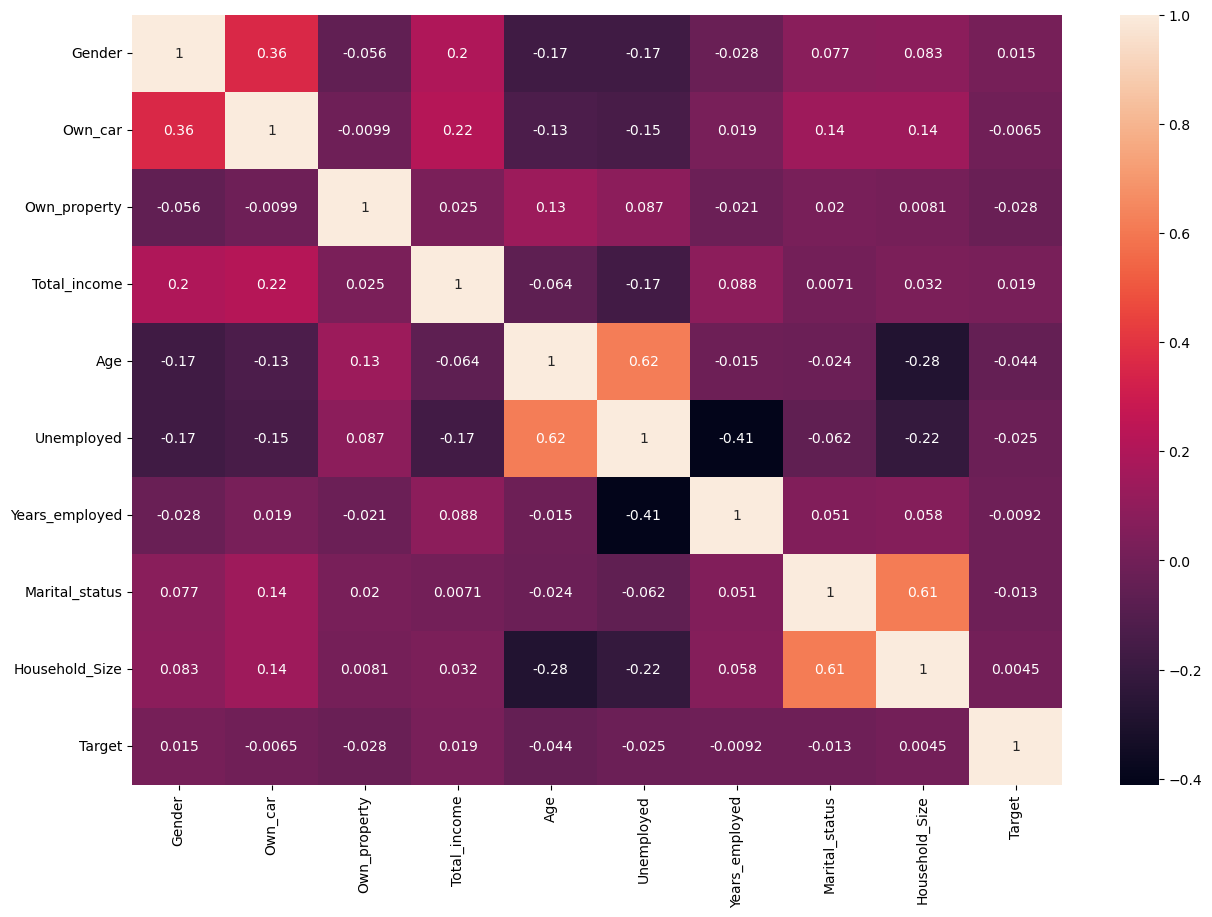

In [72]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

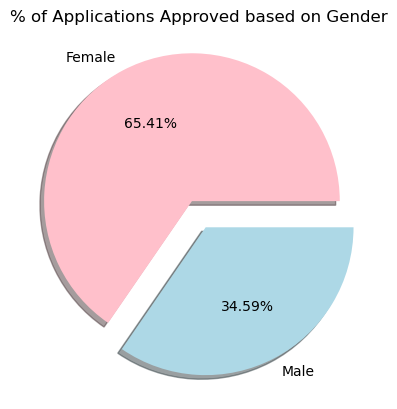

In [73]:
plt.pie(new_df[new_df['Target']==0]['Gender'].value_counts(), explode=[0.1,0.1],shadow =True, labels=['Female', 'Male'], autopct='%1.2f%%',colors=["pink",'lightblue'])
plt.title('% of Applications Approved based on Gender')
plt.show()

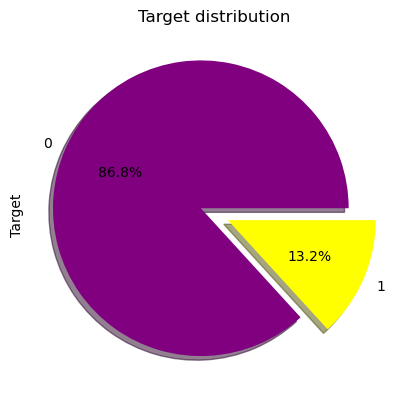

In [74]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['purple', 'yellow'],textprops = {'fontsize':10}).set_title("Target distribution")

plt.show()

In [75]:
colname=[]
for x in new_df.columns:
    if new_df[x].dtype=='object':
        colname.append(x)
colname

['Income_type', 'Education_type', 'Housing_type']

In [76]:
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Pensioner': 0, 'Student': 1, 'Working': 2}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'secondary': 2}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}


In [77]:
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]  

In [78]:
print(X.shape)
print(Y.shape)

(9701, 12)
(9701,)


In [79]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [80]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
     

In [81]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

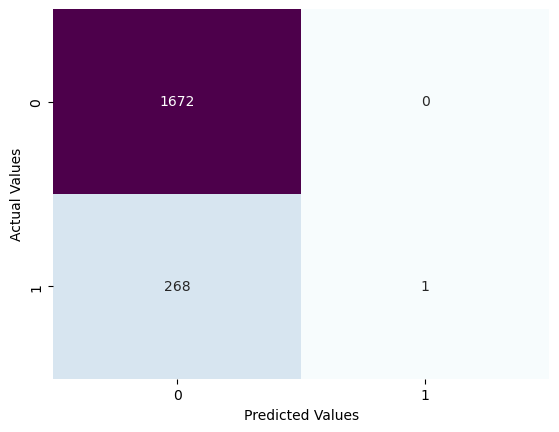

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       1.00      0.00      0.01       269

    accuracy                           0.86      1941
   macro avg       0.93      0.50      0.47      1941
weighted avg       0.88      0.86      0.80      1941

Accuracy of the model:  0.8619268418341062


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

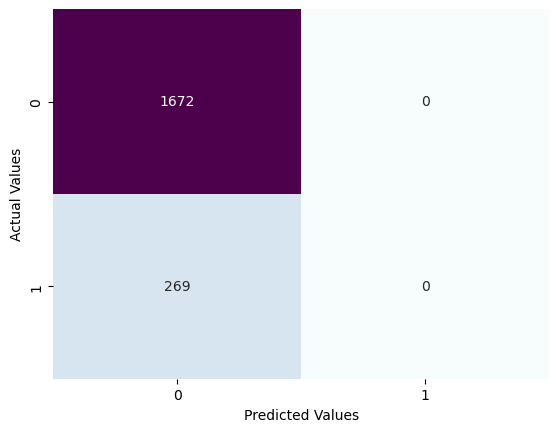

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [84]:
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

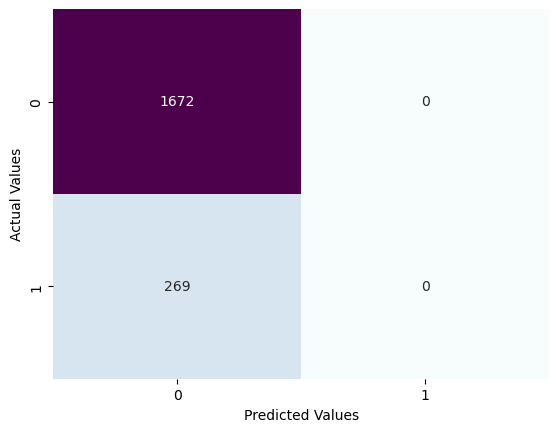

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [86]:
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [87]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",max_depth=7,random_state=10)
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

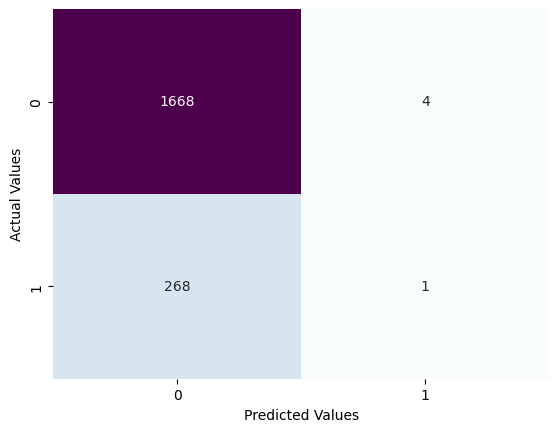

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1672
           1       0.20      0.00      0.01       269

    accuracy                           0.86      1941
   macro avg       0.53      0.50      0.47      1941
weighted avg       0.77      0.86      0.80      1941

Accuracy of the model:  0.859866048428645


In [88]:
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [89]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=RandomForestClassifier(n_estimators=50,random_state=10,n_jobs=-1, max_depth=7)
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

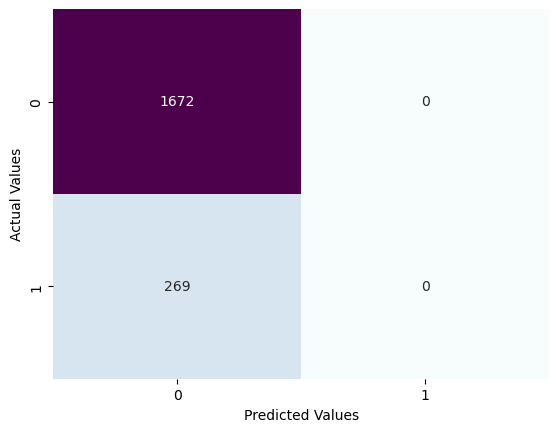

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1672
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1941
   macro avg       0.43      0.50      0.46      1941
weighted avg       0.74      0.86      0.80      1941

Accuracy of the model:  0.8614116434827409


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)
model_ExtraTrees.fit(X_train,Y_train)
Y_pred = model_ExtraTrees.predict(X_test)

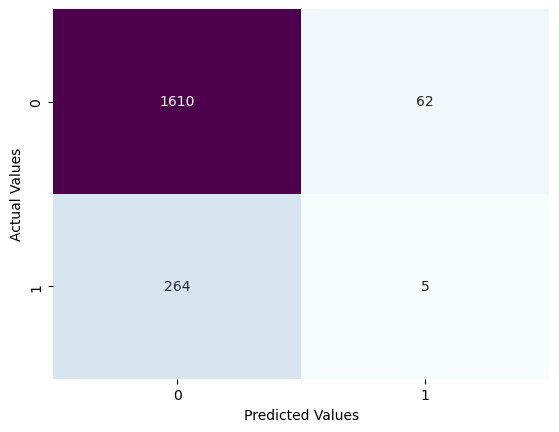

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1672
           1       0.07      0.02      0.03       269

    accuracy                           0.83      1941
   macro avg       0.47      0.49      0.47      1941
weighted avg       0.75      0.83      0.79      1941

Accuracy of the model:  0.8320453374549202


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [93]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

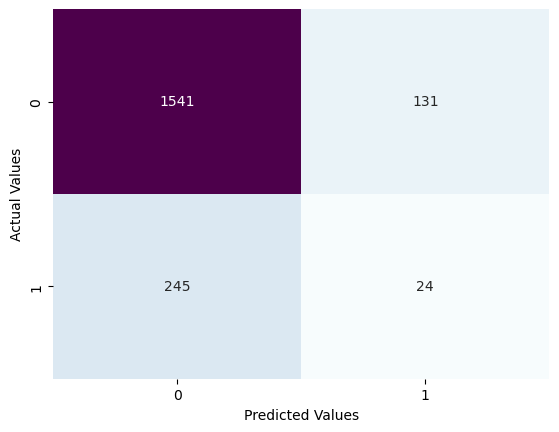

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1672
           1       0.15      0.09      0.11       269

    accuracy                           0.81      1941
   macro avg       0.51      0.51      0.50      1941
weighted avg       0.76      0.81      0.78      1941

Accuracy of the model:  0.8062854198866564


In [94]:
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [95]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=100,
                              random_state=10)
model_XGBoost.fit(X_train,Y_train)
Y_pred=model_XGBoost.predict(X_test)

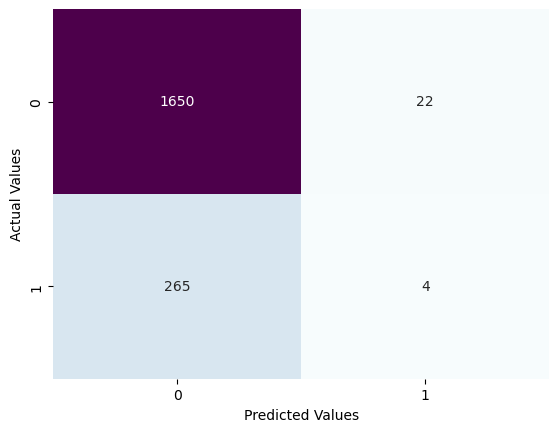

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1672
           1       0.15      0.01      0.03       269

    accuracy                           0.85      1941
   macro avg       0.51      0.50      0.47      1941
weighted avg       0.76      0.85      0.80      1941

Accuracy of the model:  0.8521380731581659


In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [107]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10, force_row_wise=True)
lgb.fit(X_train, Y_train)
Y_pred=lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 893, number of negative: 5897
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 6790, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.131517 -> initscore=-1.887612
[LightGBM] [Info] Start training from score -1.887612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
# pip install lightgbm

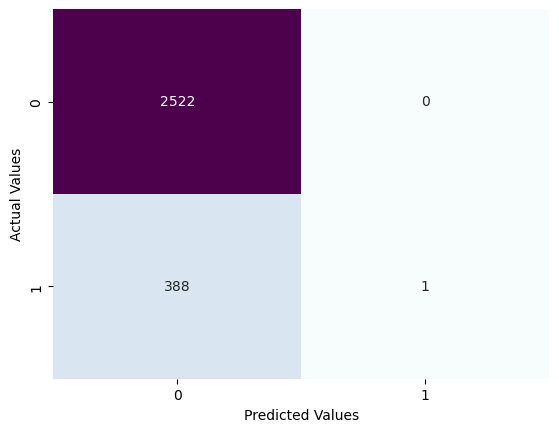

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2522
         1.0       1.00      0.00      0.01       389

    accuracy                           0.87      2911
   macro avg       0.93      0.50      0.47      2911
weighted avg       0.88      0.87      0.81      2911

Accuracy of the model:  0.8667124699416008


In [108]:
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [101]:
X=new_df.values[:,:-1]      
Y=new_df.values[:,-1]

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  893
Before OverSampling, counts of label '0':  5897
After OverSampling, the shape of train_X:  (11794, 12)
After OverSampling, the shape of train_y:  (11794,)
After OverSampling, counts of label '1':  5897
After OverSampling, counts of label '0':  5897


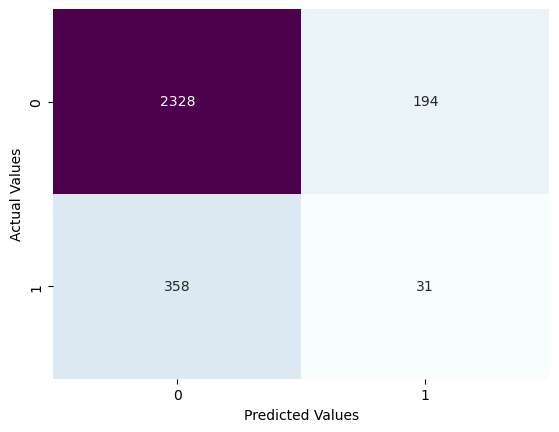

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      2522
         1.0       0.14      0.08      0.10       389

    accuracy                           0.81      2911
   macro avg       0.50      0.50      0.50      2911
weighted avg       0.77      0.81      0.79      2911

Accuracy of the model:  0.8103744417725868


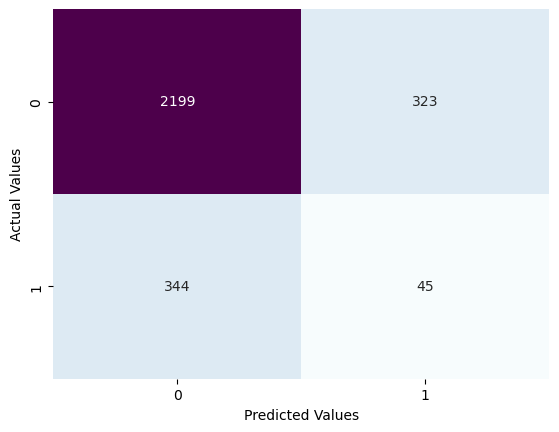

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      2522
         1.0       0.12      0.12      0.12       389

    accuracy                           0.77      2911
   macro avg       0.49      0.49      0.49      2911
weighted avg       0.77      0.77      0.77      2911

Accuracy of the model:  0.7708691171418757


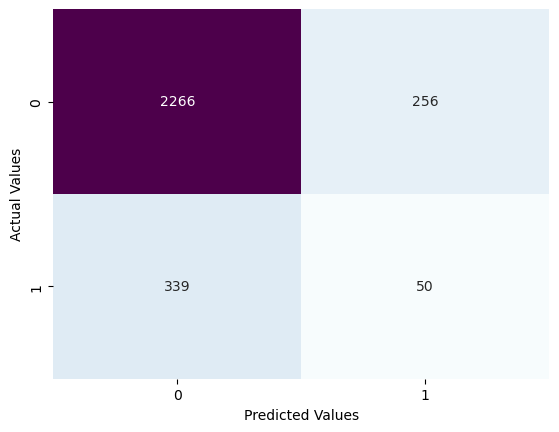

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2522
         1.0       0.16      0.13      0.14       389

    accuracy                           0.80      2911
   macro avg       0.52      0.51      0.51      2911
weighted avg       0.78      0.80      0.79      2911

Accuracy of the model:  0.7956028856063209


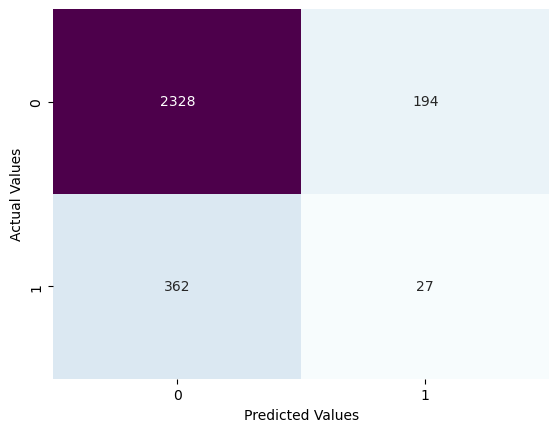

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      2522
         1.0       0.12      0.07      0.09       389

    accuracy                           0.81      2911
   macro avg       0.49      0.50      0.49      2911
weighted avg       0.77      0.81      0.79      2911

Accuracy of the model:  0.809000343524562


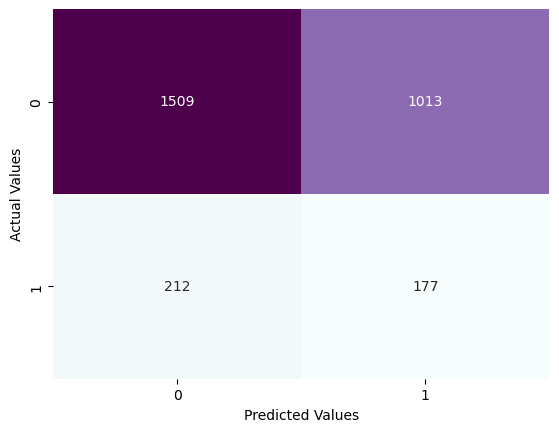

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.60      0.71      2522
         1.0       0.15      0.46      0.22       389

    accuracy                           0.58      2911
   macro avg       0.51      0.53      0.47      2911
weighted avg       0.78      0.58      0.65      2911

Accuracy of the model:  0.5791824115424253


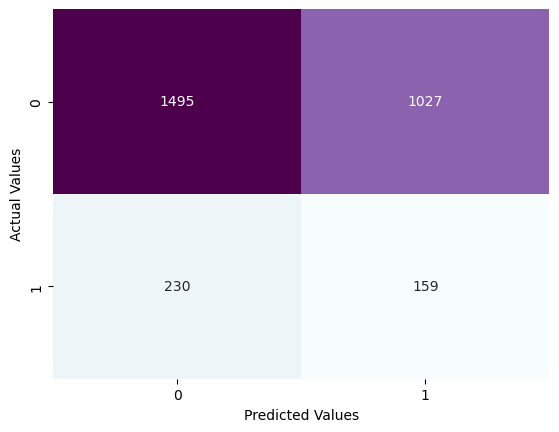

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70      2522
         1.0       0.13      0.41      0.20       389

    accuracy                           0.57      2911
   macro avg       0.50      0.50      0.45      2911
weighted avg       0.77      0.57      0.64      2911

Accuracy of the model:  0.5681896255582274


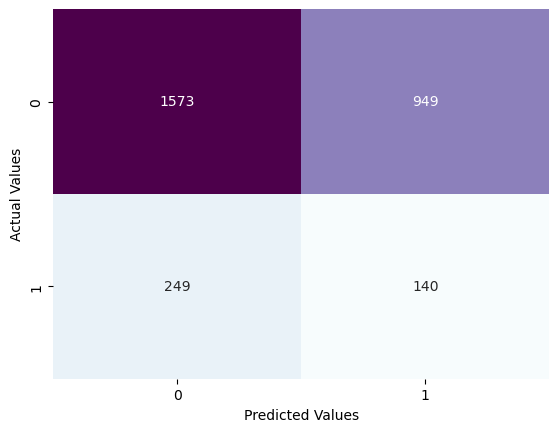

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.62      0.72      2522
         1.0       0.13      0.36      0.19       389

    accuracy                           0.59      2911
   macro avg       0.50      0.49      0.46      2911
weighted avg       0.77      0.59      0.65      2911

Accuracy of the model:  0.5884575747165922


In [104]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)

Y_pred=model_RandomForest.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
     

#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train_res,Y_train_res)

Y_pred = model_ExtraTrees.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)



#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train_res,Y_train_res)

Y_pred=model_AdaBoost.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=500,
                              random_state=10)

model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_res,Y_train_res)

Y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train_res,Y_train_res)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=7,
                              metric='euclidean')

model_KNN.fit(X_train_res,Y_train_res)

Y_pred=model_KNN.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)